In [32]:
import matplotlib.pyplot as plt

from functions import expected_utility_prospect_theory

# Single Agent Testing

Two single agent test are performed:

1) **The ultility of a single agent for taking the adaptiation measure vs not taking the adaptation measre**

 Expected outcome: 
- The utility should never be >0, as just negative values are used to calculate the utility.
- The utility of taking no measure should be on average higher than taking the measure, if fixed parameters are used to for the subjective risk perception (RPt), estimated flood damage (per flooding scenario), flood risk, measure of the cost, and subsidie. Variations in the utility are due to paramters of the functions (used to calcualte the utility, see functions.py), being randomly drawn from a distribution.


2) **The decision for taking an adaptation measure or not**

Excpected oucome:
- If the agent has enough savings, and has more savings than the defined savings threshold after potentially purchasing the adaptation measure...
- And if the agents utility of adaptiong is higher than not adapting...
- Then the agent is expected to adapt.

(It might be important to note that a case where the expected utility of not taking a measre and taking the measure are equal, doesn't exits. This is due to the nature of the calcualtion of the utilities as presented in the first single agent test)


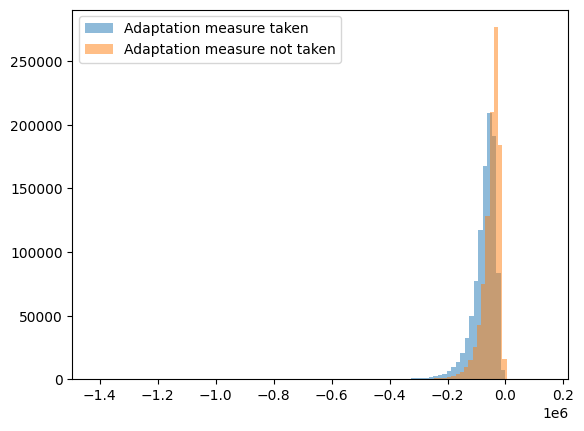

In [25]:
# Single Agent: Calculate utility of adaption and non-adaption

# Parameters needed
flood_risk = [0.05, 0.15, 0.3, 0.5] # flood risk for 'harvey', '100yr', '500yr', or no-flood flood-event
flood_damage_estimated_list = [10000, 10000, 10000, 0] # exemplary flood damage for each flood risk in USD
RPt = 0.5 # Risk perception of the agent (0.5 is neutral/objective risk perception)
cost_measure = 35000 # Cost of the measure in USD
subsidie = 5000 # Subsidie for the measure in USD

# Initilaize the expected utility for adaptation=True and adaptation=False
expected_utility_measure = 0
expected_utility_nomeasure = 0

# Define the number of runs
num_runs = 1000000

# Initialize lists to store the results
expected_utility_measure_list = []
expected_utility_nomeasure_list = []

# Run the code multiple times
for _ in range(num_runs):
    # Reset the expected utilities for each run
    expected_utility_measure = 0
    expected_utility_nomeasure = 0

    # Calculate the expected utilities
    for risk_of_flood, perceived_flood_damage in zip(flood_risk, flood_damage_estimated_list):
        utility_adaptation_true = expected_utility_prospect_theory(risk_of_flood=risk_of_flood,
                                                                   percieved_flood_damage=perceived_flood_damage,
                                                                   RPt=RPt,
                                                                   cost_of_measure=cost_measure,
                                                                   subsidie=subsidie,
                                                                   action=True,
                                                                   )
        expected_utility_measure += utility_adaptation_true

        utility_adaptation_false = expected_utility_prospect_theory(risk_of_flood=risk_of_flood,
                                                                    percieved_flood_damage=perceived_flood_damage,
                                                                    RPt=RPt,
                                                                    cost_of_measure=cost_measure,
                                                                    subsidie=subsidie,
                                                                    action=False,
                                                                    )
        expected_utility_nomeasure += utility_adaptation_false

    # Store the results
    expected_utility_measure_list.append(expected_utility_measure)
    expected_utility_nomeasure_list.append(expected_utility_nomeasure)

# Plot the distribution of the results
plt.hist(expected_utility_measure_list, bins=100, alpha=0.5, label='Adaptation measure taken')
plt.hist(expected_utility_nomeasure_list, bins=100, alpha=0.5, label='Adaptation measure not taken')
plt.legend(loc='upper left')
plt.show()

# Inspecting the plot visually, we can see that the expected utility of the measure is higher than the expected utility of no measure
# with non of them being >0.


In [31]:
# Define the lists of expected utilities and savings
expected_utility_measure_list = [-200000, -100000, -100000]
expected_utility_nomeasure_list = [-100000, -200000, -200000]
savings_list = [40000, 40000, 0]  # Agent's savings in USD for each scenario

savings_threshold = 5000  # Threshold for savings in USD
is_adapted = False  # Initialize adaptation status of the agent

# Iterate over the expected utilities and savings
for expected_utility_measure, expected_utility_nomeasure, savings in zip(expected_utility_measure_list, expected_utility_nomeasure_list, savings_list):
    # Check if the agent should adapt
    if expected_utility_measure > expected_utility_nomeasure and savings > (cost_measure - subsidie + savings_threshold):
        is_adapted = True  # Agent adapts to flooding
        savings = savings - cost_measure  # Agent pays for adaptation measures
    else:
        is_adapted = False

    # Print the expected utilities, savings and the outcome
    print(f"Expected utility with measure: {expected_utility_measure}")
    print(f"Expected utility without measure: {expected_utility_nomeasure}")
    print(f"Savings: {savings}")
    print(f"Is adapted: {is_adapted}")
    print("\n")

Expected utility with measure: -200000
Expected utility without measure: -100000
Savings: 40000
Is adapted: False


Expected utility with measure: -100000
Expected utility without measure: -200000
Savings: 5000
Is adapted: True


Expected utility with measure: -100000
Expected utility without measure: -200000
Savings: 0
Is adapted: False


